Linear Regression Assignment

In [87]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [88]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [89]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [91]:
print(bos.shape)

(506, 13)


In [92]:
bos.columns = boston.feature_names

In [93]:
print(bos.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [98]:
bos['price']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [95]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [96]:
bos.isnull().sum(0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [86]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [97]:
x = bos.drop(columns ='price', axis =1)
y = bos['price']

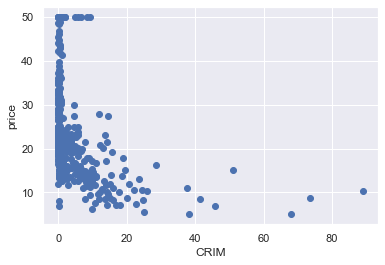

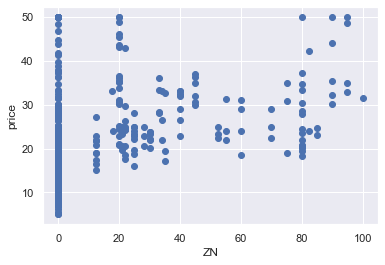

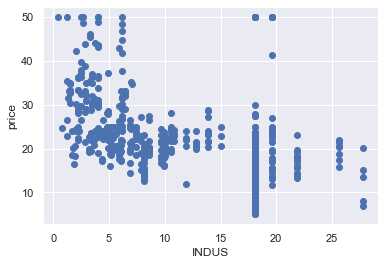

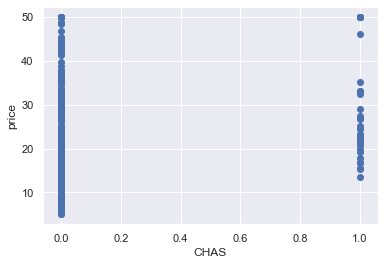

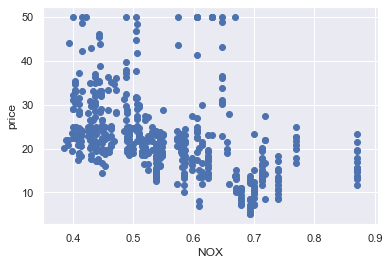

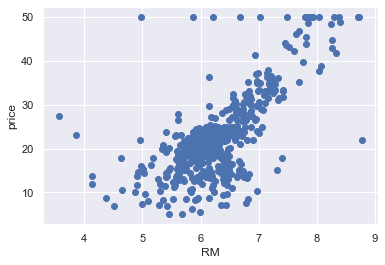

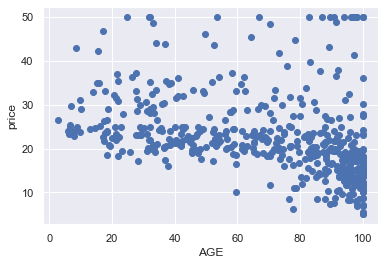

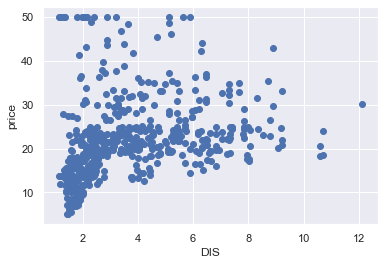

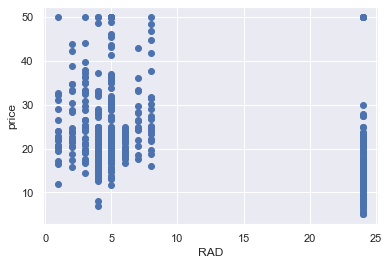

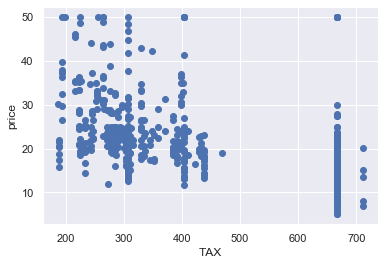

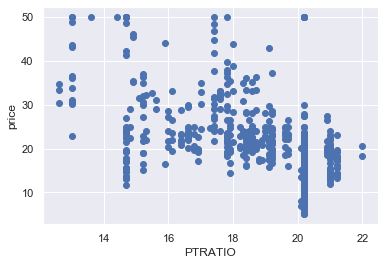

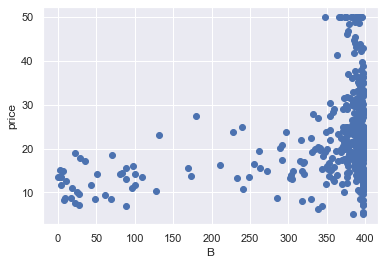

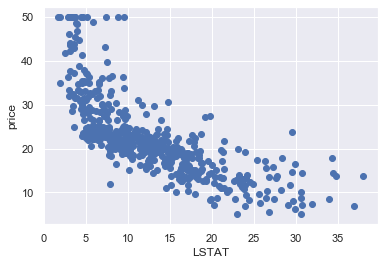

In [100]:
for columns in x:
    if (columns !=['price']):
        plt.scatter(x[columns],y)
        plt.xlabel(columns)
        plt.ylabel('price')
        plt.show()     

    

In [101]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_data = scaler.fit_transform(x)
scaled_data

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [172]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size = 0.33,random_state=125)

In [175]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [176]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
y_predict = reg.predict(test_x)

In [178]:
y_predict

array([21.332609  , 19.49187463, 21.59160204, 24.43616743, 14.21497398,
       23.65031175, 16.95806765, 14.89413577, 33.73015442, 17.84771638,
       25.7273084 , 36.72574787, 26.35509474, 28.09655248, 19.37409698,
       20.24298856, 26.11079571, 18.00236197, 16.63762481, 16.96147171,
       23.72045106, 16.29914694, 16.67478836, 22.90804886, 25.621907  ,
       12.57974056, 29.08086507, 10.49458266, 25.88233673, 25.43505912,
       18.48668756, 24.73998642, 14.28106724, 12.10585765, 21.09009128,
       15.44564926, 16.54560546, 21.96493215, 30.78867459, 24.43117859,
       19.21400437, 23.89018101, 27.80227219, 14.19493791, 36.26881415,
       24.87126308, 12.66335946, 32.90289786, 25.76805878, 27.90132454,
       23.58410638, 19.23447179,  7.52820626, 40.95749559, 20.85116562,
       17.80344   , 19.11086934, 28.22010511, 17.64726211, 20.6776271 ,
       37.98468685, 39.13184091, 22.79142966, 20.11388423, 22.09153752,
       21.26545226, 17.33029639, 22.20439473, 26.08210183, 21.30

In [163]:
df =pd.DataFrame(test_y)
df.head()

,price
432,16.1
246,24.3
63,25.0
56,24.7
365,27.5


In [179]:
from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x),test_y)
score

0.5286593603080298

In [180]:
reg.score(train_x,train_y)

0.739726656231566

In [181]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [182]:
adj_r2(train_x,train_y)

0.7293157224808287

In [183]:
reg.score(test_x,test_y)

0.7213047701036942

In [184]:
adj_r2(test_x,test_y)

0.6976247832497597

In [185]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(train_x,train_y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [124]:
alpha = lasscv.alpha_
alpha

0.0009206829519406614

In [126]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(train_x,train_y)

Lasso(alpha=0.0009206829519406614, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [186]:
lasso_reg.score(train_x,train_y)

0.7396457729154494

In [129]:
lasso_reg.score(test_x,test_y)

0.7170867515758514

In [130]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(train_x,train_y)

RidgeCV(alphas=array([3.65397674, 5.6005015 , 1.42698892, 7.77699985, 1.05784007,
       0.95090251, 7.16313993, 2.64660955, 8.0227204 , 0.70933373,
       8.14268731, 9.41905519, 9.20668195, 3.27031343, 0.78375357,
       0.86240763, 6.50710946, 9.50004896, 4.67908129, 5.8965796 ,
       5.12396658, 7.64130368, 8.32203017, 3.18422729, 5.72079629,
       0.93313732, 0.89142856, 3.7624563 , 0.44473323, 6.11442876,
       9.85992172, 8.60289421, 0.42817904, 2.7963584 , 8.96948058,
       3.80704324, 2.38748688, 7.38828774, 9.60485228, 3.85211544,
       2.18479221, 9.87610521, 5.12290237, 2.21049132, 8.08457045,
       4.98003822, 1.76120859, 5.89874533, 2.11933474, 7.71347007]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [131]:
ridgecv.alpha_

0.42817904004505913

In [132]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(train_x,train_y)

Ridge(alpha=0.42817904004505913, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [133]:
ridge_model.score(test_x,test_y)

0.7170834026313817

In [134]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(train_x,train_y)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [135]:
elasticCV.alpha_

0.013246385419337878

In [136]:
elasticCV.l1_ratio

0.5

In [137]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(train_x,train_y)

ElasticNet(alpha=0.013246385419337878, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [138]:
elasticnet_reg.score(test_x,test_y)

0.7166247513536617